In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

In [2]:
data=pd.read_csv("Microsoft Data.csv")
data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.059827,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.061963,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063032,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061429,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060361,47894400


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       9800 non-null   object 
 1   Open       9800 non-null   float64
 2   High       9800 non-null   float64
 3   Low        9800 non-null   float64
 4   Close      9800 non-null   float64
 5   Adj Close  9800 non-null   float64
 6   Volume     9800 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 536.1+ KB


In [4]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [5]:
data["Date"]=pd.to_datetime(data["Date"])
data.set_index("Date",inplace=True)

<Axes: xlabel='Date', ylabel='Close'>

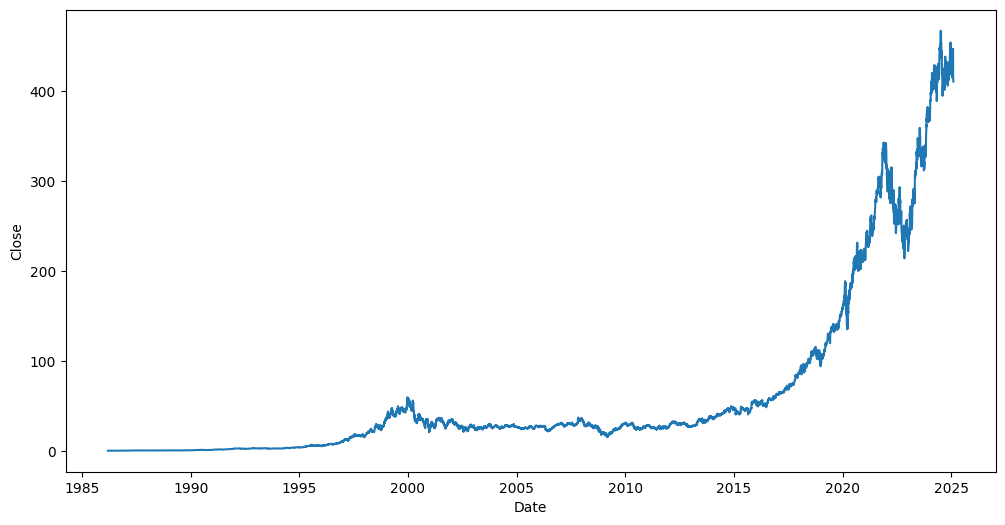

In [10]:
plt.figure(figsize=(12,6))
sns.lineplot(x="Date",y="Close",data=data)

In [11]:
df=data[["Close"]].values

In [12]:
scaler=MinMaxScaler(feature_range=(0,1))
scaler_data=scaler.fit_transform(df)

In [14]:
def create_sequence(df,sequence_length):
    X=[]
    y=[]
    for i in range(sequence_length,len(df)):
        X.append(df[i-sequence_length:i,0])
        y.append(df[i,0])
    return np.array(X),np.array(y)

In [15]:
sequence_length=10

In [16]:
X,y=create_sequence(scaler_data,sequence_length)

In [17]:
X=X.reshape((X.shape[0],X.shape[1],1))
print(X.shape,y.shape)

(9790, 10, 1) (9790,)


In [20]:
model = Sequential()
model.add(LSTM(50,activation="relu",input_shape=(X.shape[1],X.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer="adam",loss="mean_squared_error")
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.fit(X,y,epochs=100,batch_size=32,verbose=1)

Epoch 1/100
306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0091
Epoch 2/100
306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0010
Epoch 3/100
306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.4641e-04
Epoch 4/100
306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.4891e-04
Epoch 5/100
306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.1194e-04
Epoch 6/100
306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.2448e-04
Epoch 7/100
306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.9773e-04
Epoch 8/100
306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.9104e-04
Epoch 9/100
306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.7526e-04
Epoch 10/100
306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.4543e-04
Epoch 11/100
306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.3083e-04
Epoch 12/100
306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.1536e-04
Epoch 13/100
306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.6325e-04
Epoch 14/100
306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.1537

In [22]:
loss=model.evaluate(X,y)
print("Model loss:",loss)

306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step - loss: 1.6613e-05
Model loss: 4.804618583875708e-05


In [23]:
predictions=model.predict(X)
predictions=scaler.inverse_transform(predictions)
print(predictions[:20])

306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[1.7834826]
 [1.7836671]
 [1.7835835]
 [1.7833397]
 [1.7834059]
 [1.783681 ]
 [1.7839701]
 [1.7839109]
 [1.7841198]
 [1.7845831]
 [1.7850672]
 [1.7857916]
 [1.7865858]
 [1.787272 ]
 [1.7885501]
 [1.7897413]
 [1.7899956]
 [1.7902951]
 [1.7901105]
 [1.7900026]]


In [24]:
actual_values=scaler.inverse_transform(y.reshape(-1,1))

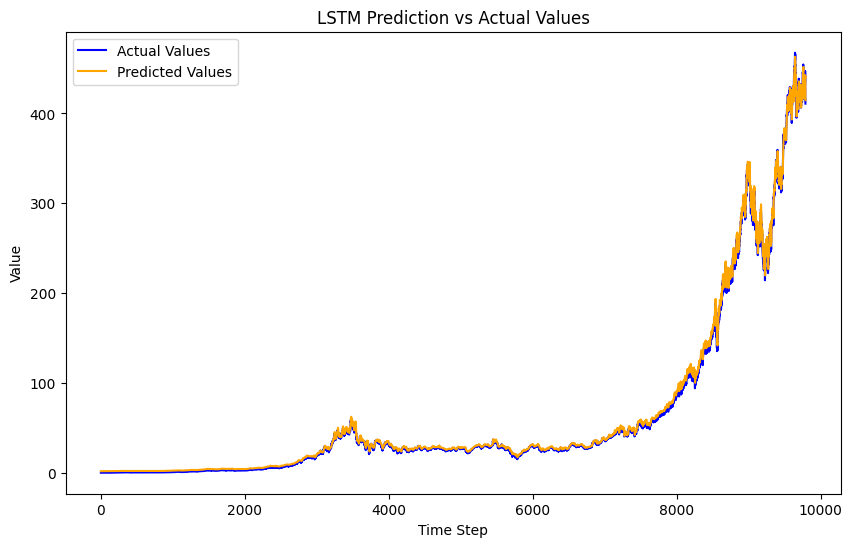

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(actual_values, label="Actual Values",color="blue")  
plt.plot(predictions, label="Predicted Values",color="orange") 
plt.legend()
plt.title('LSTM Prediction vs Actual Values')  
plt.xlabel('Time Step') 
plt.ylabel('Value')  
plt.show()